In [4]:
import pandas as pd
import matplotlib.pyplot as plt    

In [5]:
df = pd.read_csv("../data/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


## describe() ger info om alla kolumner med numeriska värden

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df_salary_currencies = df["salary_currency"].value_counts()
df_salary_currencies

salary_currency
USD    143173
GBP      4040
EUR      3053
CAD       667
INR       151
PLN       104
CHF        54
AUD        36
PHP        31
SGD        25
BRL        23
TWD        17
JPY        14
CZK        12
HUF         9
NOK         7
MXN         6
ZAR         5
DKK         5
TRY         4
ILS         3
THB         2
SEK         1
NZD         1
HKD         1
CLP         1
Name: count, dtype: int64

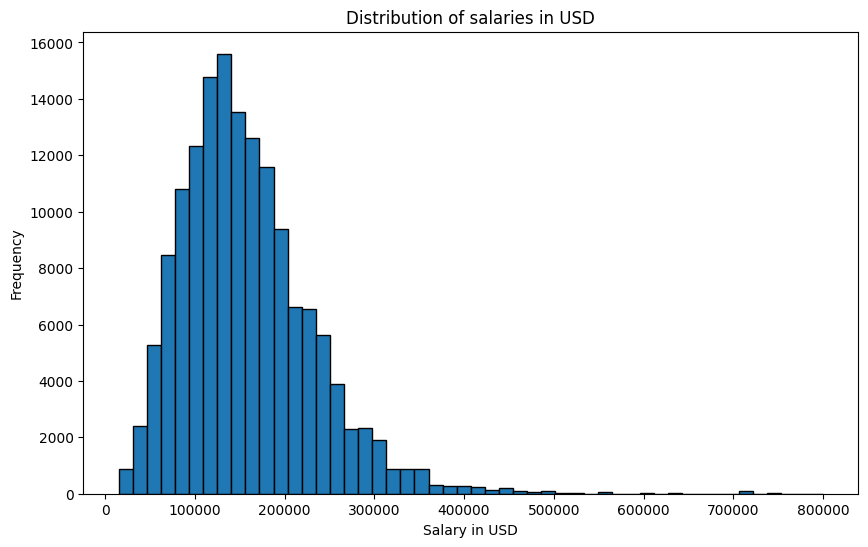

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df["salary_in_usd"], bins=50, edgecolor="black")
plt.title("Distribution of salaries in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

## c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

In [16]:
df_job_titles = df["job_title"].value_counts().nlargest(10)
df_job_titles

job_title
Data Scientist               18751
Software Engineer            16948
Data Engineer                16352
Data Analyst                 13779
Engineer                     11004
Machine Learning Engineer     8887
Manager                       7811
Analyst                       5396
Research Scientist            3460
Product Manager               2576
Name: count, dtype: int64

In [18]:
tenth_title = df_job_titles.index[9]   # eftersom index är 0-baserat
print("Tionde vanligaste titel:", tenth_title)

Tionde vanligaste titel: Product Manager


In [20]:
df_tenth = df[df["job_title"] == tenth_title]
df_tenth

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,2025,SE,FT,Product Manager,207000,USD,207000,US,100,US,M
29,2025,SE,FT,Product Manager,144200,USD,144200,US,100,US,M
48,2025,SE,FT,Product Manager,140000,USD,140000,US,0,US,M
49,2025,SE,FT,Product Manager,110000,USD,110000,US,0,US,M
392,2025,SE,FT,Product Manager,205000,USD,205000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
121165,2024,MI,FT,Product Manager,140000,USD,140000,US,0,US,M
121258,2024,SE,FT,Product Manager,230400,USD,230400,US,0,US,M
121259,2024,SE,FT,Product Manager,192000,USD,192000,US,0,US,M
121266,2024,SE,FT,Product Manager,260586,USD,260586,US,0,US,M


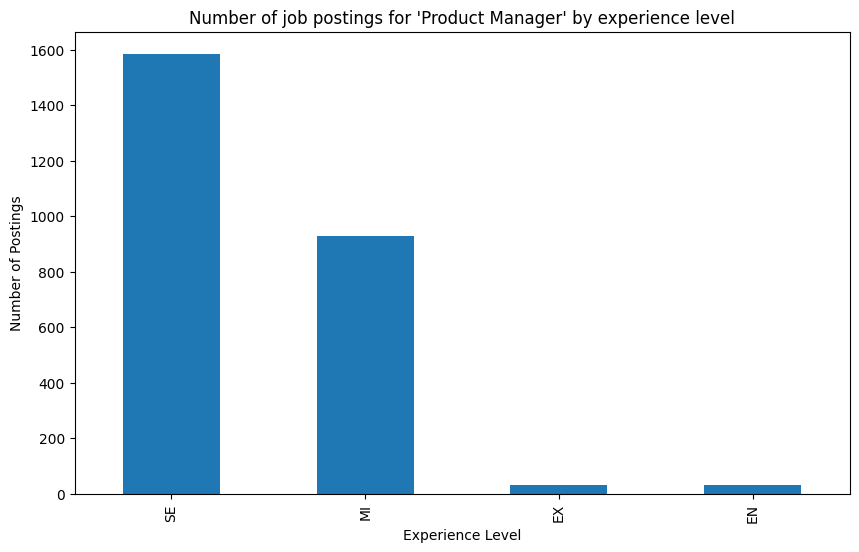

In [21]:
plt.figure(figsize=(10,6))
df_tenth["experience_level"].value_counts().plot(kind="bar")
plt.title(f"Number of job postings for '{tenth_title}' by experience level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Postings")
plt.show()

##   d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


## Gruppera job_titles och experience_level, räkna ut median och medellön, skapa nyu kolumn för SEK och sortera

In [10]:
# Gruppera på job_title och experience_level
df_grouped = (
            df.groupby(["job_title", "experience_level"])["salary_in_usd"]
            .agg(median_salary_usd="median", mean_salary_usd="mean")
            .reset_index()            
            )

In [11]:
# Skapa en medellön i SEK
df_grouped["mean_salary_sek"] = df_grouped["mean_salary_usd"] * 10.5

In [12]:
# Sortera efter lön i kronor
df_grouped = df_grouped.sort_values("mean_salary_sek", ascending=False)

df_grouped

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
1,AI Architect,MI,800000.0,800000.0,8400000.00
815,Research Team Lead,SE,450000.0,450000.0,4725000.00
728,Principal Data Scientist,EX,416000.0,416000.0,4368000.00
92,Analytics Engineering Manager,SE,399880.0,399880.0,4198740.00
463,Data Science Tech Lead,SE,375000.0,375000.0,3937500.00
...,...,...,...,...,...
82,Alternance,EN,19825.0,19825.0,208162.50
890,Stage,MI,19578.5,19578.5,205574.25
281,Data Analyst Lead,EN,18000.0,18000.0,189000.00
785,Quantitative Risk Analyst,MI,18000.0,18000.0,189000.00


##  f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings

In [13]:
df_grouped.head()

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
1,AI Architect,MI,800000.0,800000.0,8400000.0
815,Research Team Lead,SE,450000.0,450000.0,4725000.0
728,Principal Data Scientist,EX,416000.0,416000.0,4368000.0
92,Analytics Engineering Manager,SE,399880.0,399880.0,4198740.0
463,Data Science Tech Lead,SE,375000.0,375000.0,3937500.0


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [19]:
df["salary_sek_per_month"] = df["salary_in_usd"] * 10.5 / 12
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_sek_per_month
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M,304951.500
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M,203301.000
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M,127225.000
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M,71400.000
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M,140000.000
...,...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,360500.000
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,132125.000
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,91875.000
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,87500.000


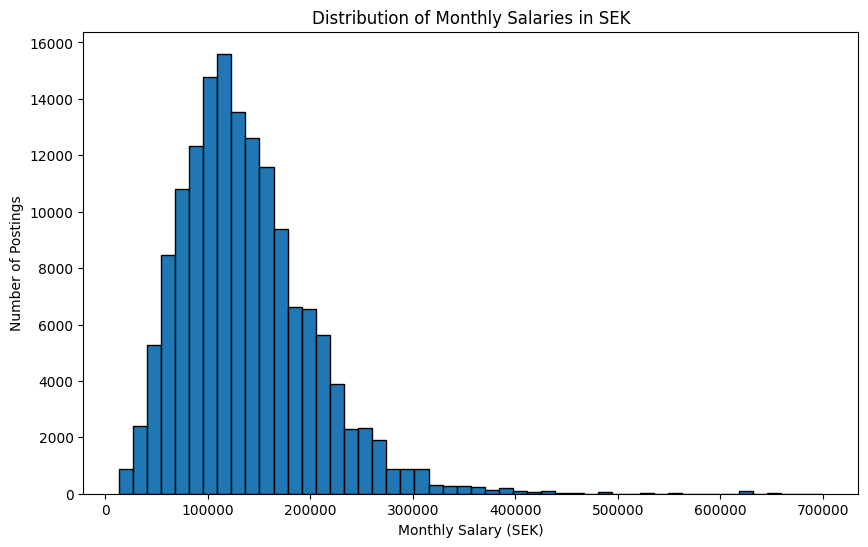

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df["salary_sek_per_month"], bins=50, edgecolor="black")
plt.title("Distribution of Monthly Salaries in SEK")
plt.xlabel("Monthly Salary (SEK)")
plt.ylabel("Number of Postings")
plt.show()

##   g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?



In [24]:
df.groupby("experience_level")["salary_sek_per_month"].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,13663.0,86591.518362,48481.386382,13125.000,54379.50000,75775.00,108412.5,693994.0
EX,4163.0,175412.499970,69526.050025,13125.000,126525.00000,165698.75,218662.5,546875.0
MI,46128.0,124513.530602,63077.600219,13125.000,81005.09375,113750.00,153825.0,700000.0
SE,87491.0,151075.543819,62016.306741,13689.375,107625.00000,140875.00,183750.0,700000.0


##   h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.



In [ ]:
# Räkna alla förekomster av respektive jobtitel
job_counts = df["job_title"].value_counts()
# job_counts

# Sortera ut de som har färre än 5000 tjänster
common_jobs = job_counts[job_counts > 5000].index
common_jobs

Index(['Data Scientist', 'Software Engineer', 'Data Engineer', 'Data Analyst',
       'Engineer', 'Machine Learning Engineer', 'Manager', 'Analyst'],
      dtype='object', name='job_title')

In [ ]:
# Spara i ny df de som återfinns i common_jobs
df_common = df[df["job_title"].isin(common_jobs)]
df_common

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_sek_per_month
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M,127225.000
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M,71400.000
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M,140000.000
5,2025,MI,FT,Engineer,140000,USD,140000,US,100,US,M,122500.000
12,2025,SE,FT,Manager,230000,USD,230000,US,0,US,M,201250.000
...,...,...,...,...,...,...,...,...,...,...,...,...
151436,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M,104176.625
151438,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L,24822.875
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,360500.000
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,91875.000


In [ ]:
# gruppera på titel, visa lön per månad (medianvärdet) i fallande ordning
median_salaries = df_common.groupby("job_title")["salary_sek_per_month"].median().sort_values(ascending=False)
median_salaries

job_title
Machine Learning Engineer    165375.0
Software Engineer            157500.0
Engineer                     139125.0
Manager                      136062.5
Data Scientist               131250.0
Data Engineer                122500.0
Analyst                       91875.0
Data Analyst                  86625.0
Name: salary_sek_per_month, dtype: float64

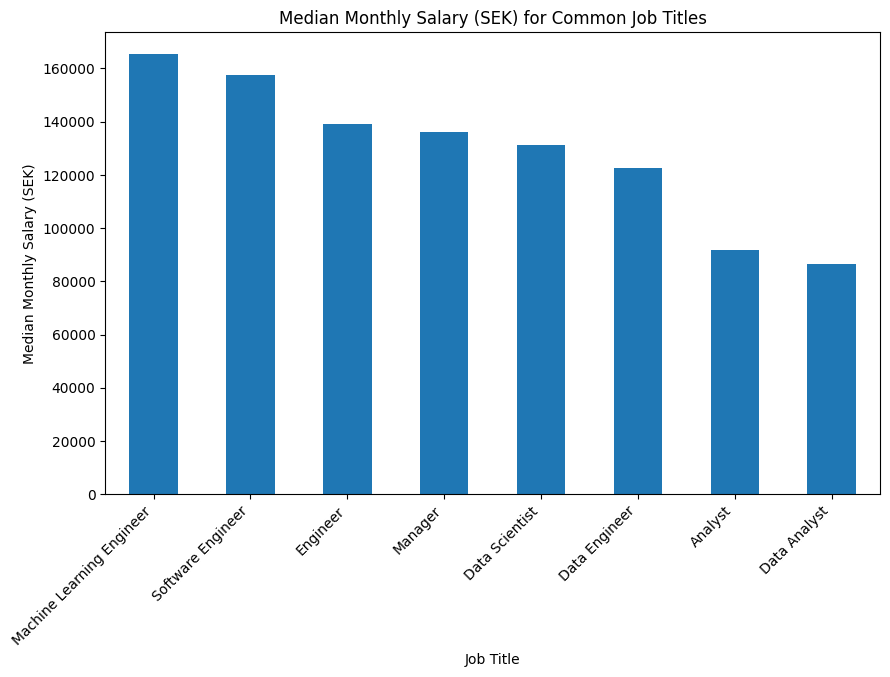

In [47]:
plt.figure(figsize=(10,6))
median_salaries.plot(kind="bar")
plt.title("Median Monthly Salary (SEK) for Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Median Monthly Salary (SEK)")
plt.xticks(rotation=45, ha="right")
plt.show()

## i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

In [ ]:
# Har ingen sådan .csv-fil

: 

a) Why could it be good to combine duckdb and pandas?

I duckdb kan man använda sig av SQL-kod vilken kan vara mer lättläslig, pandas finns mer gratis, typ value_counts()

b) How do you create a DataFrame in Pandas from a dictionary, a list of dictionaries, and a CSV file, json object?

från dictionary:                data = {"name": ["Alice", "Bob"], "age": [25, 30]}
                                df = pd.DataFrame(data)
från en lista av dictionarys:   data = [{"name": "Alice", "age": 25}, {"name": "Bob", "age": 30}]   
                                df = pd.DataFrame(data)
från csv-fil:                   df = pd.read_csv("data.csv")                            
från json-fil:                  df = pd.read_json("data.json")

c) What is the difference between .loc[] and .iloc[] for indexing in Pandas?

.loc - label-based indexing
.iloc - integer positional-based indexing

d) What is the purpose of the .groupby() method in Pandas? How is it used in data aggregation?

Att gruppera det man vill ha information om, det som grupperas blir "keys" och det andra "values"
Aggregeringsfunktioner som .mean(), .sum(), .median(), .count() kan beräkna statistik per grupp

e) How do you export a pandas dataframe into a csv file?

df.to_csv("output.csv", index=False)  # index=False för att inte spara radindex

f) How do you save a pandas dataframe into a duckdb database?

import duckdb

con = duckdb.connect("mydatabase.duckdb")  # skapa eller anslut till DB
con.execute("CREATE TABLE IF NOT EXISTS my_table AS SELECT * FROM df")

